In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs , init_notebook_mode , plot,iplot
init_notebook_mode(connected=True)

In [16]:
reliance=pd.read_csv('C:/Users/atyam/OneDrive/Desktop/Stock_Price_predictions/reliance.csv')
reliance.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-19,498.276825,506.672241,492.977081,504.121429,491.214630,7683649
1,2016-07-20,505.186340,509.322144,503.502289,506.697021,493.724243,5660441
2,2016-07-21,507.192322,507.687622,497.781525,498.450195,485.688568,3097170
3,2016-07-22,498.276825,504.121429,497.831055,502.660278,489.790863,3184126
4,2016-07-25,502.239258,507.068512,498.945496,506.573181,493.603546,3803482


In [17]:
reliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1483 non-null   object 
 1   Open       1483 non-null   float64
 2   High       1483 non-null   float64
 3   Low        1483 non-null   float64
 4   Close      1483 non-null   float64
 5   Adj Close  1483 non-null   float64
 6   Volume     1483 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 81.2+ KB


In [18]:
reliance['Date'] = pd.to_datetime(reliance['Date'])

In [19]:
print(f'Dataframe contains stock prices between {reliance.Date.min()} {reliance.Date.max()}')
print(f'Total days ={(reliance.Date.max() - reliance.Date.min()).days} days')


Dataframe contains stock prices between 2016-07-19 00:00:00 2022-07-18 00:00:00
Total days =2190 days


In [20]:
reliance.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1.483000e+03
mean,1439.379079,1456.244087,1421.668096,1438.235269,1427.992923,9.848742e+06
std,661.742067,669.470889,653.152850,660.873987,666.188625,7.290701e+06
min,470.539764,491.689270,460.633667,484.284454,471.885468,7.871600e+05
25%,913.912018,921.217774,905.268982,912.178467,895.439179,5.575402e+06
50%,1274.816040,1284.969727,1263.572632,1270.259155,1257.219360,7.659571e+06
75%,2058.000000,2084.250000,2028.625000,2055.175049,2050.154785,1.131222e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2819.850098,6.584835e+07


<AxesSubplot:>

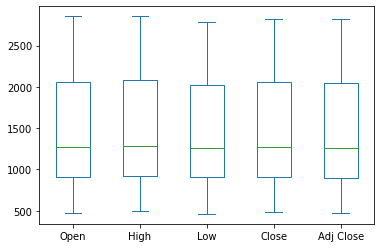

In [21]:
reliance[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [22]:
#setting the layout for our plot 
layout = go.Layout(
    title='Stock Prices of reliance',
    xaxis=dict(
       title='Date',
       titlefont=dict(
          family='Courier New,monospace',
          size=18,
          color='#7f7f7f'
    )
    ),
    yaxis = dict(
        title='Price',
        titlefont=dict(
            family='Courier New,monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
reliance_data = [{'x':reliance['Date'], 'y':reliance['Close']}]
Plot = go.Figure(data=reliance_data,layout=layout)


In [23]:
iplot(Plot)

In [24]:
#buliding the regression model
from sklearn.model_selection import train_test_split
#for preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [25]:
#Split the data into train and test sets
X =np.array(reliance.index).reshape(-1,1)
Y =reliance['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [26]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
#Creating a Linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [29]:
#plot actual and predicted values for train dataset
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode = 'markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='predicted'
)
reliance_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2 = go.Figure(data=reliance_data,layout=layout)

In [30]:
iplot(plot2)

In [31]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center (20) }{'Test'.center (20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict (X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9401429168701136	0.9345937576787823
MSE       26767.45220227196	26572.86222664807

